In [95]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable
import csv
from scipy import stats
from scipy.fft import fft, fftfreq
import scipy.io
from scipy.io import savemat
from scipy.interpolate import UnivariateSpline 
from astropy.timeseries import LombScargle # for Lomb
from scipy.optimize import curve_fit

import os
from datetime import datetime, timedelta
import matplotlib.dates as mdates


import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline


In [96]:
initial_folder = r'C:\Users\Demag\Documents\Comsol sims\Nico'

files = os.listdir(initial_folder)
for i in range(len(files)):
    if ".mph" in files[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', files[i]) 

[0] -----------> 10_15_added_filter_d2.csv
[1] -----------> 10_16.csv
[2] -----------> 10_16_2.csv
[3] -----------> 1h_1s_50mK_p10_i1_17_11.csv
[4] -----------> 1h_test.csv
[5] -----------> 1_1_05_1h_2nd_run.csv
[6] -----------> 1_1_5_1h_1st_run.csv
[7] -----------> 4h_0.1s_p0.9_i4.3_D0.3_20_11.csv
[8] -----------> 4h_1s_p10_i1_17_11.csv
[9] -----------> 4h_1s_p1_i6_20_11.csv
[10] -----------> 4h_1s_p1_i6_d0.5_17_11.csv
[19] -----------> overn_p10_i1_17_11.csv
[20] -----------> overn_p1_i5_21_11.csv
[21] -----------> overn_p1_i7_22_11.csv
[22] -----------> P1_I0Dot1.csv
[27] -----------> Test.csv
[28] -----------> TestOverNight14112023.csv
[29] -----------> weekend_50mK_1s_p10_i1.csv


In [99]:
file = files[21]
file_pass = initial_folder+"\\"+file
file1 = open(file_pass, 'r')
lines = file1.readlines()

dict_data=dict()

keys = lines[0].split(',')
print(keys)

file1.close()
data = lines[1:]

date_format = '%H.%M.%S.%f %Y-%m-%d'

time_pid = np.array([])

arr = data[0].split(',')
time_pid = np.append(time_pid, datetime.strptime(arr[0], date_format))
d_old = time_pid[0].day
h_old = time_pid[0].hour

PV = np.array([])
PS = np.array([])
PID1 =np.array([])

am_pm = False # False = PM, True = AM


for i in range(len(data)): 
    arr = data[i].split(',')
    time_pid = np.append(time_pid, datetime.strptime(arr[0], date_format))
    h_now = time_pid[-1].hour
    d_now = time_pid[-1].day
    
    if time_pid[-1].day != d_old: am_pm = True
    else:
        if h_old==11 and time_pid[-2].minute == 59 and time_pid[-2].second == 59: am_pm = False
    
    if am_pm:
        if h_now == 12: time_pid[-1] =  time_pid[-1]  - timedelta(hours=12)
    if not(am_pm):
        if h_now!=12: time_pid[-1] =  time_pid[-1]  + timedelta(hours=12)

    
#     print(time_pid[-1])
    
    h_old = h_now
    d_old = d_now
    
        
    PV = np.append(PV, float(arr[1]))
    PS = np.append(PS, float(arr[2]))
    PID1 = np.append(PID1, float(arr[3]))

time_pid = time_pid[1:]

['DateTime', 'Process Value', 'Process Setpoint', 'PID 1', 'PID 2', 'Setpoint 1', 'Setpoint 2\n']


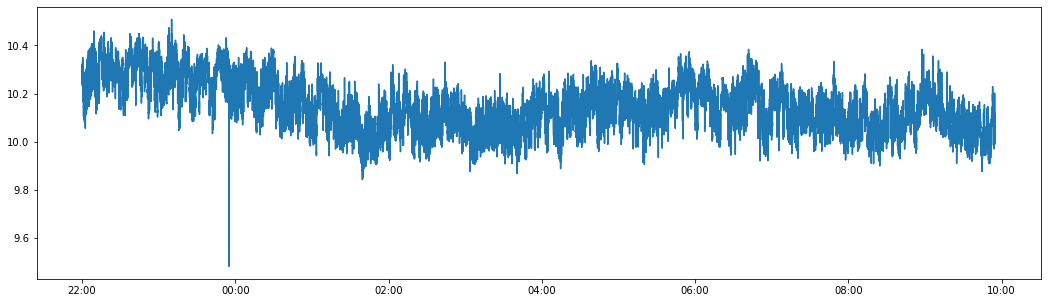

In [100]:
fig, ax = plt.subplots(figsize=(18,5)) 
ax.plot(time_pid, PID1)
fmt = mdates.DateFormatter('%H:%M') # Re-format the x-axis
ax.xaxis.set_major_formatter(fmt)

In [101]:
# convert time 
seconds = np.array([])
start = time_pid[0]
for i in range(len(time_pid)):
    s = (time_pid[i]-time_pid[0]).seconds
    ms = (time_pid[i]-time_pid[0]).microseconds/1e6
    seconds = np.append(seconds, s+ms)

# fig, ax = plt.subplots(figsize=(18,5)) 
# ax.plot(seconds, PID1)

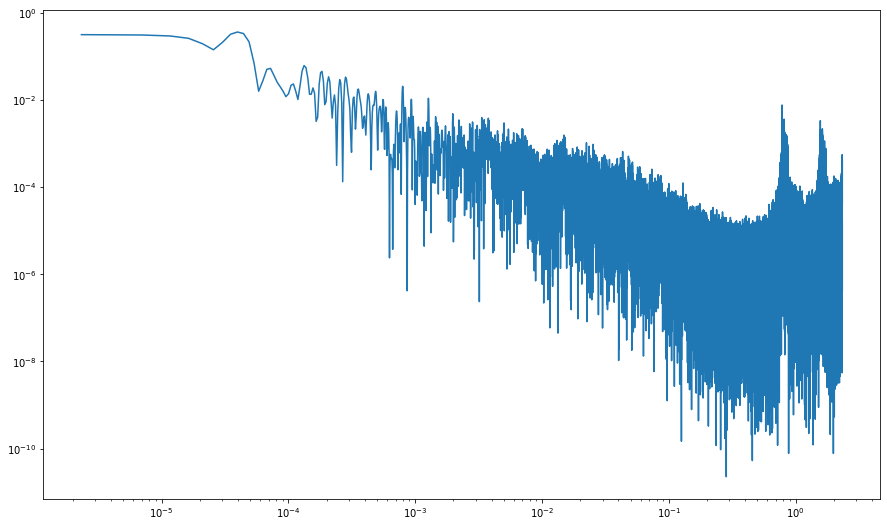

In [102]:
frequency, power = LombScargle(seconds, PID1-mean(PID1)).autopower()
fig, ax = plt.subplots(figsize=(15,9)) 
ax.loglog(frequency, power)      

In [103]:
file_pass # need to extract pid from title

'C:\\Users\\Demag\\Documents\\Comsol sims\\Nico\\overn_p1_i7_22_11.csv'

In [104]:
data = dict()
data['time'] = seconds
data['pid'] = PID1
data['global_time'] = str(time_pid)
data['p'] = 1
data['i'] = 7
data['d'] = 0
data['date'] = time_pid[0].day
data['duration'] = str(time_pid[-1] - time_pid[0])

folder_data = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi\25nm\Time_corr_fft_lomb'
file_name = folder_data + '\\'+'P_{}_I_{}_D_{}.mat'.format(data['p'], data['i'], data['d'])
savemat(file_name, data)
print(file_name, 'saved')

C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi\10nm\Time_corr_fft_lomb\P_1_I_7_D_0.mat saved


In [105]:
folder_data = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\CoSi\25nm\Time_corr_fft_lomb'

files = os.listdir(folder_data)
for i in range(len(files)):
    if ".mph" in files[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', files[i]) 

[0] -----------> LombFFT_allPID.png
[1] -----------> P_0.9_I_4.3_D_0.05.mat
[2] -----------> P_10_I_1_D_0.mat
[3] -----------> P_1_I_6_D_0.5.mat
[4] -----------> P_1_I_6_D_0.mat
[5] -----------> P_1_I_7_D_0.mat


In [107]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(7,4)) 

for i in range(len(files)):
    if ".png" in files[i]: pass
    else:
        mat = scipy.io.loadmat(folder_data+"\\" +files[i])

        sec = np.array(mat['time'])[0]
        pid = mat['pid'][0]


        frequency, power = LombScargle(sec, pid-mean(pid)).autopower()

        ax.loglog(frequency, power, alpha = 0.9, label = 'P:{}, I:{}, D:{}'.format(mat['p'][0,0], mat['i'][0,0], mat['d'][0,0]))     
        
        start = 150
        stop = 6000
        freq_selected = frequency[start:stop]
        spect_m_selected = power[start:stop]
        
        a, b = linear_fit(np.log(freq_selected), np.log(spect_m_selected))
        ax.plot(freq_selected, np.exp(linear_func(np.log(freq_selected), a, b)))
        print('{},{},{}--'.format(mat['p'][0,0], mat['i'][0,0], mat['d'][0,0]), np.round(a,3), ', P(1):', np.exp(linear_func(np.log(1), a, b)))
        
ax.legend()
ax.grid()
ax.set_xlabel('freq')
ax.set_ylabel('power')
fig.savefig(folder_data+"\\" +'LombFFT_allPID.png')
# Seem like it is not dependent on PID param anyhow except white noise level 



0.9,4.3,0.05-- -0.693 , P(1): 2.5240013367878977e-05
10,1,0-- -1.622 , P(1): 8.023282331660165e-08
1,6,0.5-- -1.447 , P(1): 5.63948634664915e-07
1,6,0-- -1.288 , P(1): 2.66425661700436e-07
1,7,0-- -0.801 , P(1): 4.267095169286107e-06


In [58]:
def linear_func(x, a, b):
    return a * x + b

def linear_fit(x, y):
    popt, pcov = curve_fit(linear_func, x, y)
    a = popt[0]
    b = popt[1]
    return a, b